In [43]:
import sys
import os
import nbconvert
import datetime
import base64
from nbconvert.writers import FilesWriter
from traitlets.config import Config
from pathlib import Path

In [60]:
BLOG_POST_PATH = r'C:\Users\Scott\OneDrive\Documents\academic-website\content\post'

exporter = nbconvert.MarkdownExporter()
nb_file = Path(r'C:\Users\Scott\OneDrive\Documents\academic-website\content\notebooks\load-datasets.ipynb')
nb_file = str(nb_file).replace(os.sep, '/')
(body, resources) = exporter.from_filename(nb_file)
blog_post_folder_title = os.path.splitext(os.path.basename(nb_file))[0]
new_blog_post_path = os.path.join(BLOG_POST_PATH, blog_post_folder_title)
if not os.path.exists(new_blog_post_path):
    os.mkdir(new_blog_post_path)
blog_file = os.path.join(new_blog_post_path, 'index.md')
creation_date = datetime.datetime.now().isoformat(sep='T')
body = f'''---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "{blog_post_folder_title}"
subtitle: ""
summary: "{blog_post_folder_title} summary"
authors: ["Scott Miner"]
tags: ""
categories: ""
date: {creation_date}
lastmod: {creation_date}
featured: false
draft: true

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

''' + body

In [61]:
c = Config()
c.FilesWriter.build_directory = new_blog_post_path
fw = FilesWriter(config=c)
fw.write(body, resources,notebook_name='index')

WindowsPath('C:/Users/Scott/OneDrive/Documents/academic-website/content/post/load-datasets/index.md')

In [42]:
for image_name, image_bytes in sorted(resources['outputs'].items()):
  with open("test_image.png", "wb") as fh:
    fh.write(base64.decodebytes(image_bytes))

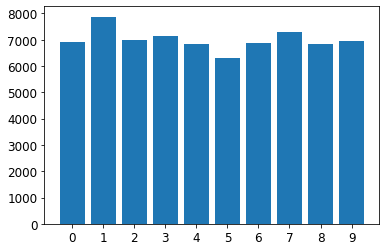

In [40]:
from IPython.display import Image
%matplotlib inline
for image_name, image_bytes in sorted(resources['outputs'].items()):
  display(Image(data=resources['outputs'][image_name], format='png'))

In [36]:
resources['outputs'].items()

dict_items([('output_8_1.png', b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x82\x00\x00\x00\xfb\x08\x06\x00\x00\x00g\xa0\x934\x00\x00\x009tEXtSoftware\x00Matplotlib version3.4.2, https://matplotlib.org/+\x83\xe2X\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00\x16\xf0IDATx\x9c\xed\xdd\x7f\xb0\xddu}\xe7\xf1\xe7K\xc2\x82&\xdcJ\xe4JY;&\x95\xa2\xb8aL\x1c\xb3\xe3\x8c\x1dD\xd7\xba\xa0\x1d+K\xfa\x07\xc2*\xc8\x96X\x18\xba\xb3R\x97\xfa\x07h\n2\xd6\xa1\xad\x9d\xaaX\xe3\x80\x80\xe8\xae0\x13\xf0\xe7ff\xa9\x8a\xc5]\xbb^[C\xf7\x0e\x91\x95\xd2Xl\xb2^h\xccO\x08\x8a\xef\xfd\xe3\xfb=\xed\xe1\xec\xbd9\xe7\x82\xf9^\xf1\xfb|\xcc|\'\xe7|\xdf\xdf\xf7\xf9|\xcf\xbd\x99\xf3:\xdf\x1f\xf7\xfbMU!I\xea\xafg-\xf5\nH\x92\x96\x96A I=g\x10HR\xcf\x19\x04\x92\xd4s\x06\x81$\xf5\xdc\xb2\xa5^\x81\xc5:\xe1\x84\x13j\xf5\xea\xd5K\xbd\x1a\x92\xf4\x8c\xf2\xado}\xeb\xe1\xaa\x9a\x9e\xaf\xf6\x8c\x0b\x82\xd5\xabW333\xb3\xd4\xab!I\xcf(Iv,Ts\xd7\x90$\xf5\x9cA I=7Q\x10$Y\x9d\xe4KIv\'\xd9\x95\xe4\xc3I\

In [24]:
import re
# remove the title from the jupyter notebook
body = re.sub(pattern='^.*?(?:\\n){1,}', repl='', string=body, flags=re.IGNORECASE | re.DOTALL )
